In [1]:
import time
from pathlib import Path
from operator import itemgetter

import scanpy as sc
import numpy as np
import pandas as pd
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.sparse import csr_matrix
from joblib import Parallel, delayed
import os
import torch

import scSLAT
from scSLAT.model import Cal_Spatial_Net, load_anndatas, run_SLAT_mlp_AGF, spatial_match, run_SLAT, compute_lisi_for_adata, run_SLAT_AGF_contrast
from scSLAT.viz import match_3D_multi, hist, Sankey, build_3D
from scSLAT.metrics import region_statistics


In [2]:
file_path_1 = os.path.join('D:/ppppaper/data/DLPFC/DLPFC/','151674')
adata_1 = sc.read_visium(path=file_path_1, count_file='filtered_feature_bc_matrix.h5', load_images=True)
adata_1.var_names_make_unique(join="++")

Ann_df_1 = pd.read_csv(os.path.join(file_path_1 , '151674_annotation.txt'),sep ='\t', header=0 , index_col=0)
Ann_df_1.loc[Ann_df_1['Layer'].isna(),'Layer'] = "unknown"
adata_1.obs['annotation'] = Ann_df_1.loc[adata_1.obs_names, 'Layer'].astype('category')

d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
file_path_2 = os.path.join('D:/ppppaper/data/DLPFC/DLPFC/','151675')
adata_2 = sc.read_visium(path=file_path_2, count_file='filtered_feature_bc_matrix.h5', load_images=True)
adata_2.var_names_make_unique(join="++")

Ann_df_2 = pd.read_csv(os.path.join(file_path_2 , '151675_annotation.txt'),sep ='\t', header=0 , index_col=0)
Ann_df_2.loc[Ann_df_2['Layer'].isna(),'Layer'] = "unknown"
adata_2.obs['annotation'] = Ann_df_2.loc[adata_2.obs_names, 'Layer'].astype('category')

d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
x1_coords=adata_1.obsm['spatial'][:,0]
y1_coords=adata_1.obsm['spatial'][:,1]
x2_coords=adata_2.obsm['spatial'][:,0]
y2_coords=adata_2.obsm['spatial'][:,1]
locations_1 = np.array([x1_coords, y1_coords])
locations_2 = np.array([x2_coords, y2_coords])

locations_1_tensor = torch.tensor(locations_1)
locations_2_tensor = torch.tensor(locations_2)
locations_1_tensor = locations_1_tensor.transpose(0, 1)
locations_1_tensor = locations_1_tensor.to(dtype=torch.float32)
locations_2_tensor = locations_2_tensor.transpose(0, 1)
locations_2_tensor = locations_2_tensor.to(dtype=torch.float32)
location = [locations_1_tensor, locations_2_tensor]

In [5]:
Cal_Spatial_Net(adata_1, k_cutoff=10, model='KNN')
Cal_Spatial_Net(adata_2, k_cutoff=10, model='KNN')

Calculating spatial neighbor graph ...
The graph contains 38433 edges, 3673 cells.
10.463653689082493 neighbors per cell on average.
Calculating spatial neighbor graph ...
The graph contains 37544 edges, 3592 cells.
10.452115812917596 neighbors per cell on average.


In [6]:
edges, features = load_anndatas([adata_1, adata_2], feature='DPCA')

Use DPCA feature to format graph


d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [14]:
embd0_0, embd0_1, embd1_0, embd1_1, embd0, embd1, time = run_SLAT_AGF_contrast(features, edges, location, limit_loss=0.0001)

GPU is not available
Running
---------- epochs: 1 ----------
---- Ran row_normalize in 0.02 s ----

---- Ran row_normalize in 0.03 s ----

---------- epochs: 2 ----------
---- Ran row_normalize in 0.02 s ----

---- Ran row_normalize in 0.02 s ----

---------- epochs: 3 ----------
---- Ran row_normalize in 0.02 s ----

---- Ran row_normalize in 0.02 s ----

---------- epochs: 4 ----------
---- Ran row_normalize in 0.02 s ----

---- Ran row_normalize in 0.03 s ----

---------- epochs: 5 ----------
---- Ran row_normalize in 0.04 s ----

---- Ran row_normalize in 0.02 s ----

---------- epochs: 6 ----------
---- Ran row_normalize in 0.03 s ----

---- Ran row_normalize in 0.04 s ----

---- Ran row_normalize in 0.03 s ----

---- Ran row_normalize in 0.02 s ----

---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
---------- Combined epochs: 0 ----------


In [19]:
adata_1.obsm['stLVG'] = embd0.detach().cpu().numpy()
adata_2.obsm['stLVG'] = embd1.detach().cpu().numpy()
adata_com = sc.concat([adata_1, adata_2], label='slice_name', keys=['slice_1', 'slice_2'])

sc.pp.neighbors(adata_com, use_rep= 'stLVG')
sc.tl.umap(adata_com)

d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


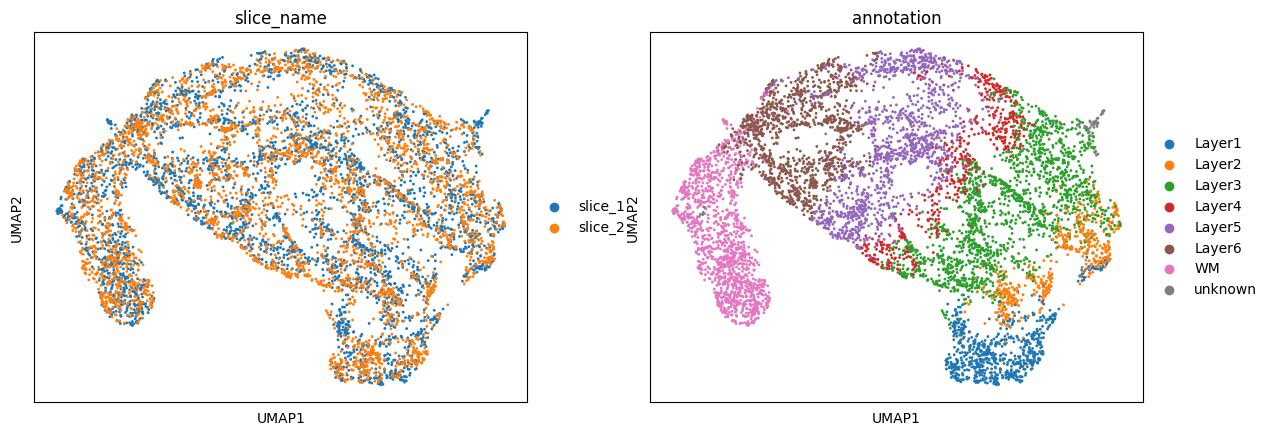

In [20]:
sc.pl.umap(adata_com, color= ['slice_name', 'annotation'])

In [10]:
spot_size = 100
pathology_color = [
    "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD", "#8C564B",
    "#E377C2", "#7F7F7F", "#BCBD22", "#17BECF", "#AEC7E8", "#FFBB78",
    "#98DF8A", "#FF9896", "#C5B0D5", "#C49C94", "#F7B6D2", "#C7C7C7",
    "#DBDB8D", "#9EDAE5", "#1F9B99", "#FFCD56", "#33A02C", "#FB9A99",
    "#A6CEE3"
]

In [16]:
# lisi_scores = compute_lisi_for_adata(adata_com, obsm_key='scSLAT_bks', obs_key_list=['annotation', 'slice_name'])
# print("LISI Scores:\n", lisi_scores)

In [15]:
true_labels_1 = adata_1.obs['annotation'].to_numpy()
true_labels_2 = adata_2.obs['annotation'].to_numpy()

best, index, distance = spatial_match([embd0, embd1], adatas=[adata_1, adata_2], reorder=False)
valid_indices = best < true_labels_1.size
valid_best = best[valid_indices]
valid_indices = np.arange(len(best))[valid_indices] 

aligned_true_labels_1 = true_labels_1[valid_best]
matched_labels_3 = true_labels_2[valid_indices]

# 计算 ARI 和 NMI
ari = adjusted_rand_score(aligned_true_labels_1, matched_labels_3)
nmi = normalized_mutual_info_score(aligned_true_labels_1, matched_labels_3)

print(f'ARI: {ari}, NMI: {nmi}')

ARI: 0.7161680108297805, NMI: 0.7407822476437436


In [16]:
adata1_df = pd.DataFrame({'index': range(embd0.shape[0]),
                        'x': adata_1.obsm['spatial'][:,0],
                        'y': adata_1.obsm['spatial'][:,1],
                        'celltype': adata_1.obs['annotation']})
adata2_df = pd.DataFrame({'index': range(embd1.shape[0]),
                        'x': adata_2.obsm['spatial'][:,0],
                        'y': adata_2.obsm['spatial'][:,1],
                        'celltype': adata_2.obs['annotation']})

matching = np.array([range(index.shape[0]), best])
best_match = distance[:,0]

In [17]:
adata2_df['target_celltype'] = adata1_df.iloc[matching[1,:],:]['celltype'].to_list()
matching_table = adata2_df.groupby(['celltype','target_celltype']).size().unstack(fill_value=0)

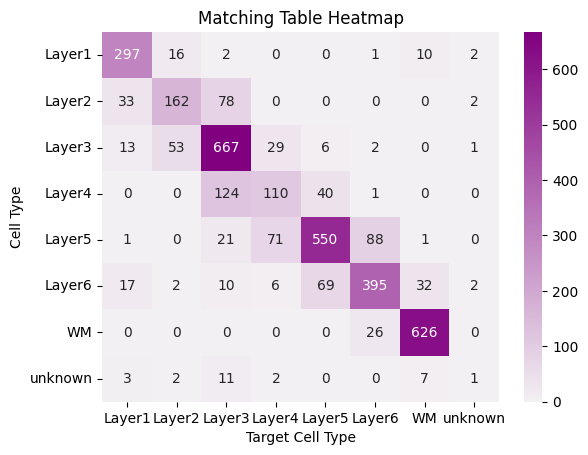

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_cmap = sns.color_palette("light:purple", as_cmap=True)

sns.heatmap(matching_table, annot = True, fmt = "d", cmap = custom_cmap)
plt.title('Matching Table Heatmap')
plt.xlabel('Target Cell Type')
plt.ylabel('Cell Type')
plt.show()

In [18]:
correct_matches = 0
total_matches = 0

for i, row in matching_table.iterrows():
    if i in matching_table.columns and row[i] > 0:
        correct_matches += row[i]
    total_matches += row.sum()


accuracy = correct_matches / total_matches if total_matches > 0 else 0
correct_matches,total_matches,accuracy

(3047, 3592, 0.8482739420935412)

In [8]:
embd2, embd3, time = run_SLAT(features, edges)

GPU is not available
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
Training model time: 21.07


In [ ]:
adata_1.obsm['SLAT'] = embd2.detach().cpu().numpy()
adata_2.obsm['SLAT'] = embd3.detach().cpu().numpy()

adata_com_2 = sc.concat([adata_1,adata_2], label= 'slice_name', keys= ['slice_1','slice_2'])

sc.pp.neighbors(adata_com_2, use_rep= 'SLAT')
sc.tl.umap(adata_com_2)

d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
d:\Anaconda\envs\scSLAT\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


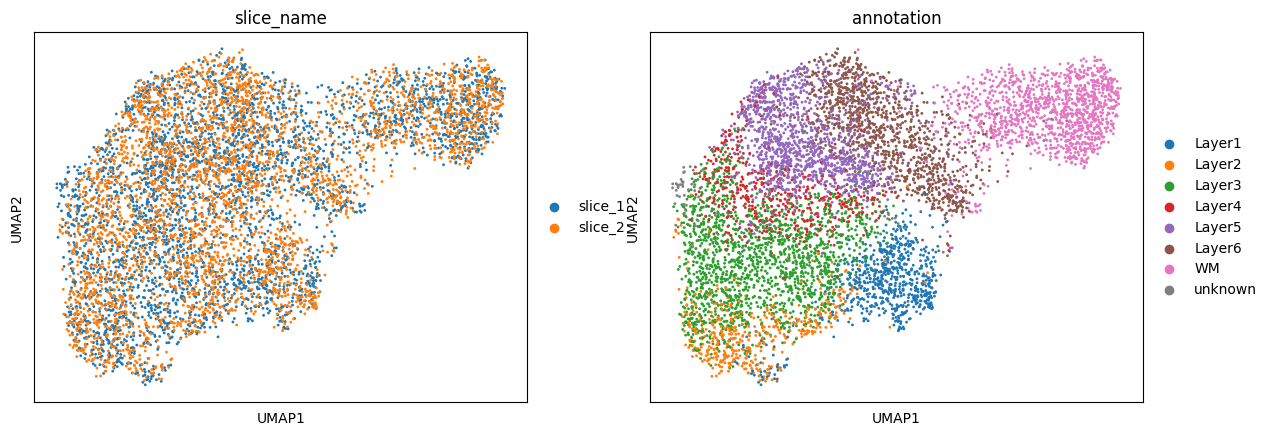

In [10]:
sc.pl.umap(adata_com_2, color= ['slice_name', 'annotation'])

In [ ]:
lisi_scores_2 = compute_lisi_for_adata(adata_com_2, obsm_key='SLAT', obs_key_list=['annotation', 'slice_name'])
print("LISI Scores:\n", lisi_scores_2)

LISI Scores:
 {'cLISI': 1.659076455487212, 'iLISI': 1.7599465718441485}


In [12]:
true_labels_1 = adata_1.obs['annotation'].to_numpy()
true_labels_2 = adata_2.obs['annotation'].to_numpy()

best_2, index_2, distance_2 = spatial_match([embd2, embd3], adatas=[adata_1, adata_2], reorder=False)
valid_indices = best_2 < true_labels_1.size
valid_best = best_2[valid_indices]
valid_indices = np.arange(len(best_2))[valid_indices] 

aligned_true_labels_1 = true_labels_1[valid_best]
matched_labels_3 = true_labels_2[valid_indices]

# 计算 ARI 和 NMI
ari = adjusted_rand_score(aligned_true_labels_1, matched_labels_3)
nmi = normalized_mutual_info_score(aligned_true_labels_1, matched_labels_3)

print(f'ARI: {ari}, NMI: {nmi}')

ARI: 0.5346783537710262, NMI: 0.5676997175565368


In [13]:
adata3_df = pd.DataFrame({'index': range(embd2.shape[0]),
                        'x': adata_1.obsm['spatial'][:,0],
                        'y': adata_1.obsm['spatial'][:,1],
                        'celltype': adata_1.obs['annotation']})
adata4_df = pd.DataFrame({'index': range(embd3.shape[0]),
                        'x': adata_2.obsm['spatial'][:,0],
                        'y': adata_2.obsm['spatial'][:,1],
                        'celltype': adata_2.obs['annotation']})

matching_2 = np.array([range(index_2.shape[0]), best_2])
best_match_2 = distance_2[:,0]

In [14]:
adata4_df['target_celltype'] = adata3_df.iloc[matching_2[1,:],:]['celltype'].to_list()
matching_table_2 = adata4_df.groupby(['celltype','target_celltype']).size().unstack(fill_value=0)

In [15]:
correct_matches = 0
total_matches = 0

for i, row in matching_table_2.iterrows():
    if i in matching_table_2.columns and row[i] > 0:
        correct_matches += row[i]
    total_matches += row.sum()


accuracy = correct_matches / total_matches if total_matches > 0 else 0
correct_matches,total_matches,accuracy

(2620, 3592, 0.7293986636971047)

In [16]:
first_indices = matching_2[0]
second_indices = matching_2[1]
second_array_labels = adata3_df.iloc[second_indices]['celltype'].values

max_index = first_indices.max()
new_labels = np.empty(max_index + 1, dtype=object)

# transfer
new_labels[first_indices] = second_array_labels

adata_2.obs['transferred_labels_SLAT'] = new_labels

[<AxesSubplot: xlabel='spatial1', ylabel='spatial2'>]

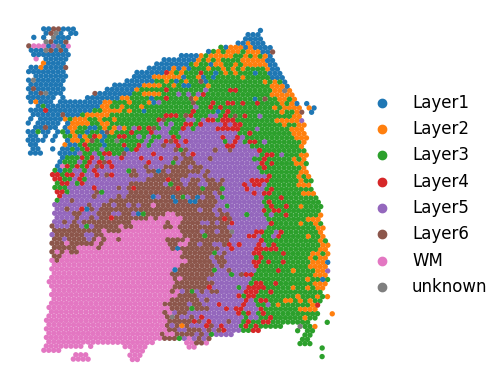

In [17]:
spot_size = 150
pathology_color = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD", "#8C564B", "#E377C2", "#7F7F7F"]
sc.pl.spatial(adata_2, img_key=None, color=['transferred_labels_SLAT'], title=[''],
                legend_fontsize=12, show=False, frameon=False, palette=pathology_color,
                spot_size=spot_size)

In [18]:
# adata_1.write('D:\ppppaper\data\Result\SLAT_DFPLC_74.h5ad')

In [19]:
# adata_2.write('D:\ppppaper\data\Result\SLAT_DFPLC_75.h5ad')

In [14]:
first_indices = matching[0]
second_indices = matching[1]
second_array_labels = adata1_df.iloc[second_indices]['celltype'].values

max_index = first_indices.max()
new_labels = np.empty(max_index + 1, dtype=object)

# transfer
new_labels[first_indices] = second_array_labels

adata_2.obs['transferred_labels'] = new_labels

NameError: name 'matching' is not defined

[<AxesSubplot: xlabel='spatial1', ylabel='spatial2'>]

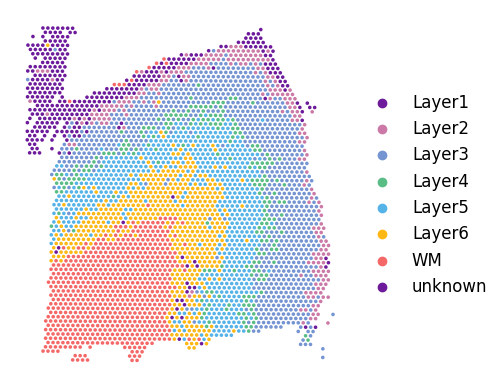

In [26]:
spot_size = 100
pathology_color = ["#6D1A9B", "#CB79A6", "#7494D2", "#59BD85", "#56B3E8", "#FDB815", "#F46867"]
sc.pl.spatial(adata_2, img_key=None, color=['transferred_labels'], title=[''],
                legend_fontsize=12, show=False, frameon=False, palette=pathology_color,
                spot_size=spot_size)

[<AxesSubplot: xlabel='spatial1', ylabel='spatial2'>]

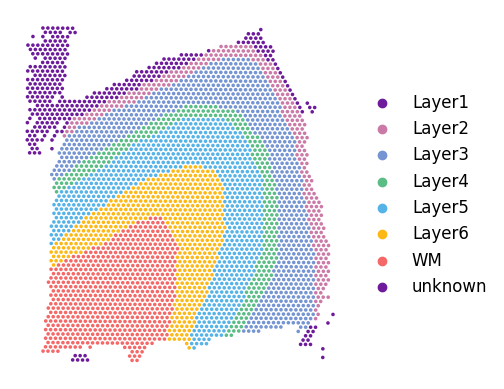

In [27]:
spot_size = 100
pathology_color = ["#6D1A9B", "#CB79A6", "#7494D2", "#59BD85", "#56B3E8", "#FDB815", "#F46867"]
sc.pl.spatial(adata_2, img_key=None, color=['annotation'], title=[''],
                legend_fontsize=12, show=False, frameon=False, palette=pathology_color,
                spot_size=spot_size)

In [28]:
adata_1.obsm['m0'] = embd0_0.detach().cpu().numpy()
adata_2.obsm['m0'] = embd1_0.detach().cpu().numpy()

adata_com = sc.concat([adata_1, adata_2], label='slice_name', keys=['slice_1', 'slice_2'])

sc.pp.neighbors(adata_com, use_rep= 'm0')
sc.tl.umap(adata_com)

d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


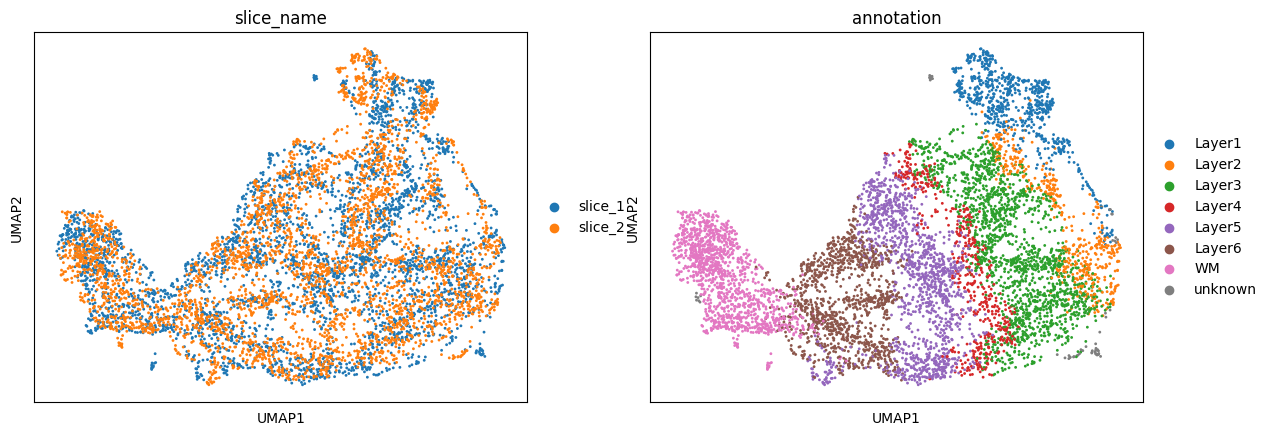

In [29]:
sc.pl.umap(adata_com, color= ['slice_name', 'annotation'])

In [66]:
lisi_scores = compute_lisi_for_adata(adata_com, obsm_key='m0', obs_key_list=['annotation', 'slice_name'])
print("LISI Scores:\n", lisi_scores)

LISI Scores:
 {'cLISI': 1.3290224213835697, 'iLISI': 1.5567234707710476}


In [31]:
true_labels_1 = adata_1.obs['annotation'].to_numpy()
true_labels_2 = adata_2.obs['annotation'].to_numpy()

best_3, index_3, distance_3 = spatial_match([embd0_0, embd1_0], adatas=[adata_1, adata_2], reorder=False)
valid_indices = best_3 < true_labels_1.size
valid_best = best_3[valid_indices]
valid_indices = np.arange(len(best_3))[valid_indices] 

aligned_true_labels_1 = true_labels_1[valid_best]
matched_labels_3 = true_labels_2[valid_indices]

# 计算 ARI 和 NMI
ari = adjusted_rand_score(aligned_true_labels_1, matched_labels_3)
nmi = normalized_mutual_info_score(aligned_true_labels_1, matched_labels_3)

print(f'ARI: {ari}, NMI: {nmi}')

ARI: 0.6722531068644985, NMI: 0.7074143506328768


In [32]:
adata5_df = pd.DataFrame({'index': range(embd0_0.shape[0]),
                        'x': adata_1.obsm['spatial'][:,0],
                        'y': adata_1.obsm['spatial'][:,1],
                        'celltype': adata_1.obs['annotation']})
adata6_df = pd.DataFrame({'index': range(embd1_0.shape[0]),
                        'x': adata_2.obsm['spatial'][:,0],
                        'y': adata_2.obsm['spatial'][:,1],
                        'celltype': adata_2.obs['annotation']})

matching_3 = np.array([range(index_3.shape[0]), best_3])
best_match_3 = distance_3[:,0]

In [33]:
adata6_df['target_celltype'] = adata5_df.iloc[matching_3[1,:],:]['celltype'].to_list()
matching_table_3 = adata6_df.groupby(['celltype','target_celltype']).size().unstack(fill_value=0)

In [34]:
correct_matches = 0
total_matches = 0

for i, row in matching_table_3.iterrows():
    if i in matching_table_3.columns and row[i] > 0:
        correct_matches += row[i]
    total_matches += row.sum()


accuracy = correct_matches / total_matches if total_matches > 0 else 0
correct_matches,total_matches,accuracy

(2936, 3592, 0.8173719376391982)

In [53]:
first_indices = matching_3[0]
second_indices = matching_3[1]
second_array_labels = adata5_df.iloc[second_indices]['celltype'].values

max_index = first_indices.max()
new_labels = np.empty(max_index + 1, dtype=object)

# transfer
new_labels[first_indices] = second_array_labels

adata_2.obs['transferred_labels_m0'] = new_labels

[<AxesSubplot: xlabel='spatial1', ylabel='spatial2'>]

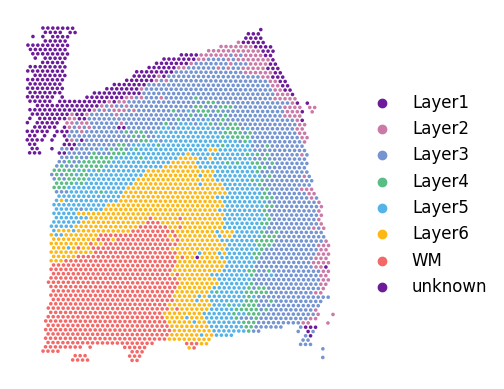

In [54]:
sc.pl.spatial(adata_2, img_key=None, color=['transferred_labels_m0'], title=[''],
                legend_fontsize=12, show=False, frameon=False, palette=pathology_color,
                spot_size=spot_size)

In [15]:
adata_1.obsm['m1'] = embd0_1.detach().cpu().numpy()
adata_2.obsm['m1'] = embd1_1.detach().cpu().numpy()

adata_com = sc.concat([adata_1, adata_2], label='slice_name', keys=['slice_1', 'slice_2'])

sc.pp.neighbors(adata_com, use_rep= 'm1')
sc.tl.umap(adata_com)

d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


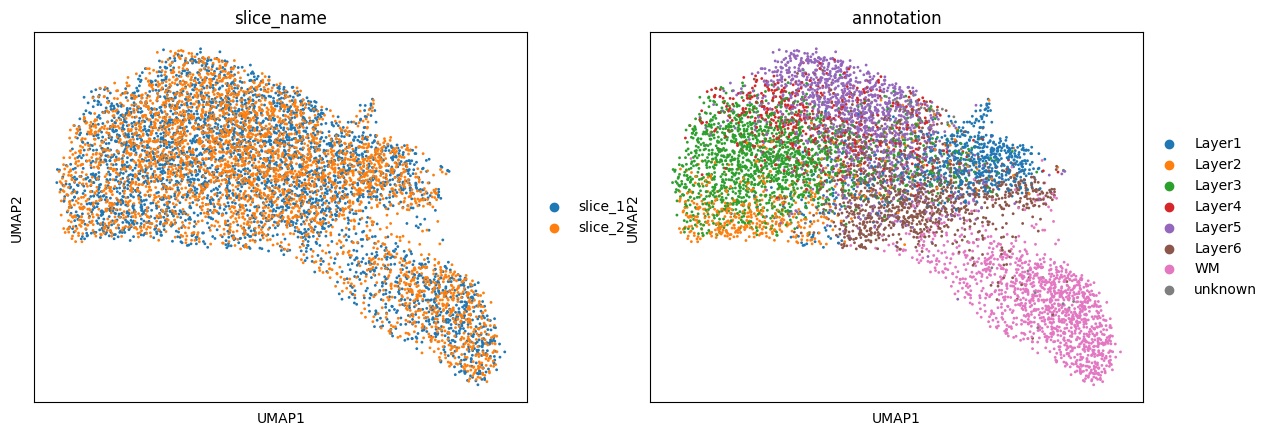

In [16]:
sc.pl.umap(adata_com, color= ['slice_name', 'annotation'])

In [37]:
# lisi_scores = compute_lisi_for_adata(adata_com, obsm_key='m1', obs_key_list=['annotation', 'slice_name'])
# print("LISI Scores:\n", lisi_scores)

In [17]:
true_labels_1 = adata_1.obs['annotation'].to_numpy()
true_labels_2 = adata_2.obs['annotation'].to_numpy()

best_4, index_4, distance_4 = spatial_match([embd0_1, embd1_1], adatas=[adata_1, adata_2], reorder=False)
valid_indices = best_4 < true_labels_1.size
valid_best = best_4[valid_indices]
valid_indices = np.arange(len(best_4))[valid_indices] 

aligned_true_labels_1 = true_labels_1[valid_best]
matched_labels_3 = true_labels_2[valid_indices]

# 计算 ARI 和 NMI
ari = adjusted_rand_score(aligned_true_labels_1, matched_labels_3)
nmi = normalized_mutual_info_score(aligned_true_labels_1, matched_labels_3)

print(f'ARI: {ari}, NMI: {nmi}')

ARI: 0.36942990335302095, NMI: 0.3910120408386245


In [39]:
adata7_df = pd.DataFrame({'index': range(embd0_1.shape[0]),
                        'x': adata_1.obsm['spatial'][:,0],
                        'y': adata_1.obsm['spatial'][:,1],
                        'celltype': adata_1.obs['annotation']})
adata8_df = pd.DataFrame({'index': range(embd1_1.shape[0]),
                        'x': adata_2.obsm['spatial'][:,0],
                        'y': adata_2.obsm['spatial'][:,1],
                        'celltype': adata_2.obs['annotation']})

matching_4 = np.array([range(index_4.shape[0]), best_4])
best_match_4 = distance_4[:,0]

In [40]:
adata8_df['target_celltype'] = adata7_df.iloc[matching_4[1,:],:]['celltype'].to_list()
matching_table_4 = adata8_df.groupby(['celltype','target_celltype']).size().unstack(fill_value=0)

In [41]:
correct_matches = 0
total_matches = 0

for i, row in matching_table_4.iterrows():
    if i in matching_table_4.columns and row[i] > 0:
        correct_matches += row[i]
    total_matches += row.sum()


accuracy = correct_matches / total_matches if total_matches > 0 else 0
correct_matches,total_matches,accuracy

(2182, 3592, 0.6074610244988864)

In [55]:
first_indices = matching_4[0]
second_indices = matching_4[1]
second_array_labels = adata7_df.iloc[second_indices]['celltype'].values

max_index = first_indices.max()
new_labels = np.empty(max_index + 1, dtype=object)

# transfer
new_labels[first_indices] = second_array_labels

adata_2.obs['transferred_labels_m1'] = new_labels

[<AxesSubplot: xlabel='spatial1', ylabel='spatial2'>]

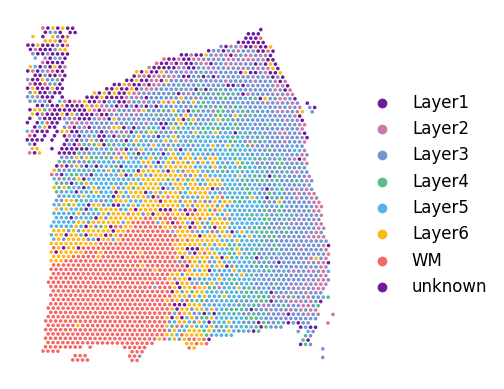

In [57]:
sc.pl.spatial(adata_2, img_key=None, color=['transferred_labels_m1'], title=[''],
                legend_fontsize=12, show=False, frameon=False, palette=pathology_color,
                spot_size=spot_size)

In [42]:
combine_1 = torch.cat([embd0_0, embd0_1], dim=1)
combine_2 = torch.cat([embd1_0, embd1_1], dim=1)

In [61]:
combine_1.size()

torch.Size([3673, 512])

In [43]:
adata_1.obsm['combine'] = combine_1.detach().cpu().numpy()
adata_2.obsm['combine'] = combine_2.detach().cpu().numpy()

adata_com = sc.concat([adata_1, adata_2], label='slice_name', keys=['slice_1', 'slice_2'])

sc.pp.neighbors(adata_com, use_rep= 'combine')
sc.tl.umap(adata_com)

d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


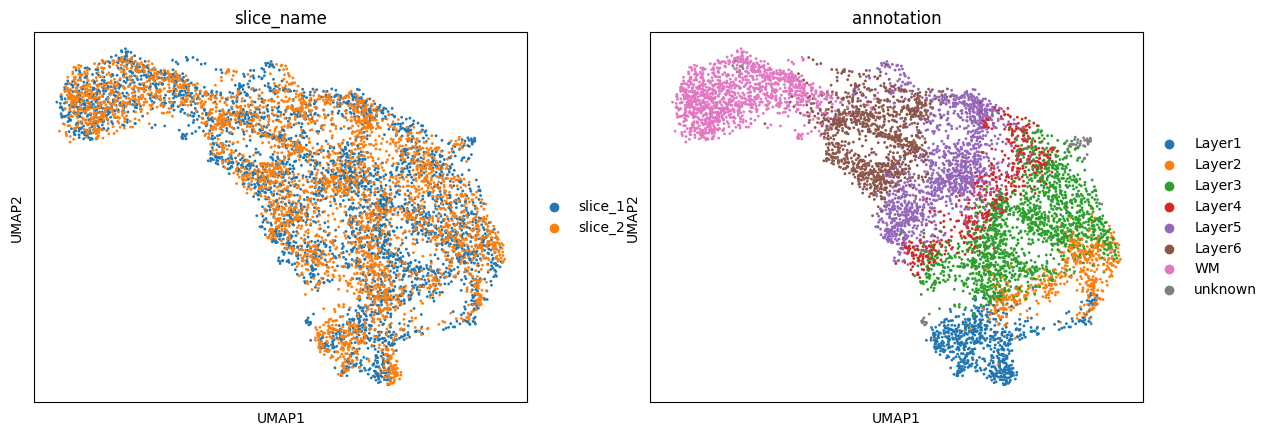

In [44]:
sc.pl.umap(adata_com, color= ['slice_name', 'annotation'])

In [45]:
true_labels_1 = adata_1.obs['annotation'].to_numpy()
true_labels_2 = adata_2.obs['annotation'].to_numpy()

best_5, index_5, distance_5 = spatial_match([combine_1, combine_2], adatas=[adata_1, adata_2], reorder=False)
valid_indices = best_5 < true_labels_1.size
valid_best = best_5[valid_indices]
valid_indices = np.arange(len(best_5))[valid_indices] 

aligned_true_labels_1 = true_labels_1[valid_best]
matched_labels_3 = true_labels_2[valid_indices]

# 计算 ARI 和 NMI
ari = adjusted_rand_score(aligned_true_labels_1, matched_labels_3)
nmi = normalized_mutual_info_score(aligned_true_labels_1, matched_labels_3)

print(f'ARI: {ari}, NMI: {nmi}')

ARI: 0.6403525361414646, NMI: 0.6668751959199928


In [46]:
adata9_df = pd.DataFrame({'index': range(combine_1.shape[0]),
                        'x': adata_1.obsm['spatial'][:,0],
                        'y': adata_1.obsm['spatial'][:,1],
                        'celltype': adata_1.obs['annotation']})
adata10_df = pd.DataFrame({'index': range(combine_2.shape[0]),
                        'x': adata_2.obsm['spatial'][:,0],
                        'y': adata_2.obsm['spatial'][:,1],
                        'celltype': adata_2.obs['annotation']})

matching_5 = np.array([range(index_5.shape[0]), best_5])
best_match_5 = distance_5[:,0]

In [47]:
adata10_df['target_celltype'] = adata9_df.iloc[matching_5[1,:],:]['celltype'].to_list()
matching_table_5 = adata10_df.groupby(['celltype','target_celltype']).size().unstack(fill_value=0)

In [48]:
correct_matches = 0
total_matches = 0

for i, row in matching_table_5.iterrows():
    if i in matching_table_5.columns and row[i] > 0:
        correct_matches += row[i]
    total_matches += row.sum()


accuracy = correct_matches / total_matches if total_matches > 0 else 0
correct_matches,total_matches,accuracy

(2863, 3592, 0.7970489977728286)

dataset1: 8 cell types; dataset2: 8 cell types; 
                    Total :8 celltypes; Overlap: 8 cell types 
                    Not overlap :[[]]
Subsampled 300 pairs from 3592


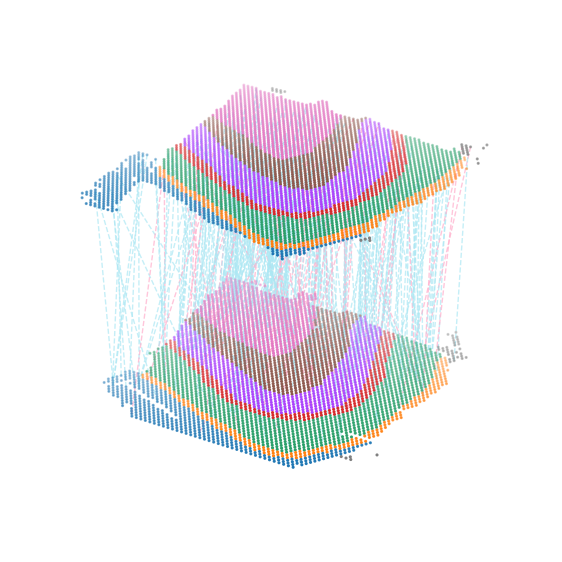

In [49]:
multi_align = match_3D_multi(adata1_df, adata2_df, matching_5, meta='celltype',
                            scale_coordinate=True, subsample_size=300)
multi_align.draw_3D(size=[7, 8], line_width=1, point_size=[1.5,1.5], hide_axis=True)

In [58]:
first_indices = matching_5[0]
second_indices = matching_5[1]
second_array_labels = adata9_df.iloc[second_indices]['celltype'].values

max_index = first_indices.max()
new_labels = np.empty(max_index + 1, dtype=object)

# transfer
new_labels[first_indices] = second_array_labels

adata_2.obs['transferred_labels_con'] = new_labels

[<AxesSubplot: xlabel='spatial1', ylabel='spatial2'>]

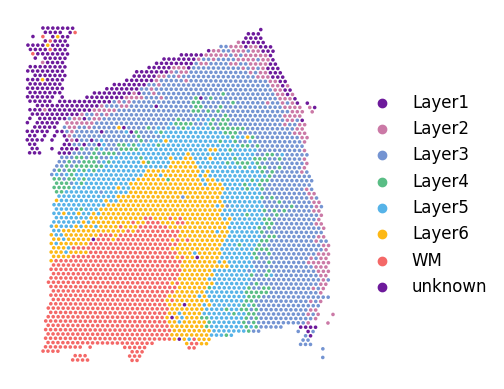

In [59]:
sc.pl.spatial(adata_2, img_key=None, color=['transferred_labels_con'], title=[''],
                legend_fontsize=12, show=False, frameon=False, palette=pathology_color,
                spot_size=spot_size)

In [50]:
# adata_1.write('D:\ppppaper\data\After\DFPLC_74.h5ad')

In [51]:
# adata_2.write('D:\ppppaper\data\After\DFPLC_75.h5ad')